In [19]:
import pandas as pd
import numpy as np
#from IPython.display import display,HTML
#import matplotlib.pyplot as plt
#%matplotlib inline

## Q1.	Given below is the data of 20 patients 
Sr. No.	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20
Gender	M	M	M	M	M	M	M	M	M	M	F	F	F	F	F	F	F	F	F	F
Age groups	1	2	3	1	1	3	3	2	1	3	3	2	2	2	3	1	1	3	3	2
BMI	23	25	26	24	23	27	27	24	21	28	26	26	23	24	25	22	19	25	26	25
DBP (B/L)	68	80	85	75	77	82	80	82	80	74	75	86	85	87	83	79	73	77	82	81
DBP (at 30 min)	75	79	90	80	81	89	92	90	80	80	89	88	87	91	88	78	74	84	83	80
DBP (at 60 min)	70	78	85	75	72	72	75	85	80	75	85	80	82	82	85	74	87	86	85	72
Age groups: 1 (<30 years), 2 (30-50 years), 3 (>50 years). 
Gender: M=Male, F=Female, 
BMI=Body mass index, 
DBP=Diastolic blood pressure, 
B/L=Baseline, min=Minute


## 1.a.	Represent the above data in a Pandas data frame with 20 observations and 6 attributes

In [18]:
data = pd.DataFrame({ "Gender": ['M','M','M','M','M','M','M','M','M','M','F','F','F','F','F','F','F','F','F','F'],
                      "Age groups": [1,2,3,1,1,3,3,2,1,3,3,2,2,2,3,1,1,3,3,2],
                      "BMI" : [23,25,26,24,23,27,27,24,21,28,26,26,23,24,25,22,19,25,26,25],
                      "DBP(B/L)" : [68,80,85,75,77,82,80,82,80,74,75,86,85,87,83,79,73,77,82,81],
                      "DBP(30min)": [75,79,90,80,81,89,92,90,80,80,89,88,87,91,88,78,74,84,83,80],
                      "DBP(60min)": [70,78,85,75,72,72,75,85,80,75,85,80,82,82,85,74,87,86,85,72]
                    })
display(data)

,Gender,Age groups,BMI,DBP(B/L),DBP(30min),DBP(60min)
0,M,1,23,68,75,70
1,M,2,25,80,79,78
2,M,3,26,85,90,85
3,M,1,24,75,80,75
4,M,1,23,77,81,72
5,M,3,27,82,89,72
6,M,3,27,80,92,75
7,M,2,24,82,90,85
8,M,1,21,80,80,80
9,M,3,28,74,80,75


## 1.b.	Identify the data in terms of categorical, numeric etc.

In [33]:
print("Display all columns which are numeric", data.select_dtypes(include='number').columns.tolist())
categoricalCols = [col for col in data.columns if data[col].dtype=="O"]
print("Display all columns which are categorical", categoricalCols)

Display all columns which are numeric ['Age groups', 'BMI', 'DBP(B/L)', 'DBP(30min)', 'DBP(60min)']
Display all columns which are categorical ['Gender']


## 1.c.	Write descriptive statistics for the numeric data

In [35]:
print ("\nDescribe Numerical data")
display(data.describe(exclude=object))


Describe Numerical data


,Age groups,BMI,DBP(B/L),DBP(30min),DBP(60min)
count,20.000000,20.000000,20.000000,20.000000,20.00000
mean,2.100000,24.450000,79.550000,83.900000,79.25000
std,0.852242,2.187885,4.871777,5.580983,5.68354
min,1.000000,19.000000,68.000000,74.000000,70.00000
25%,1.000000,23.000000,76.500000,80.000000,74.75000
50%,2.000000,25.000000,80.000000,83.500000,80.00000
75%,3.000000,26.000000,82.250000,89.000000,85.00000
max,3.000000,28.000000,87.000000,92.000000,87.00000


## 1.d.	Analyse and represent the categorical variables in terms of percentage through a pie chart

Text(0, 0.5, 'Age groups (Female)')

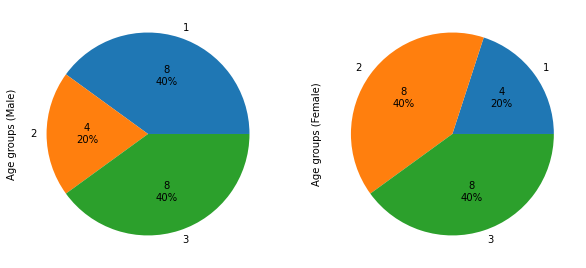

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
data[data.Gender == 'M'].groupby('Age groups').size().plot(kind='pie', autopct=label_function,ax=ax1).set_ylabel('Age groups (Male)', size=10)
data[data.Gender == 'F'].groupby('Age groups').size().plot(kind='pie', autopct=label_function,ax=ax2).set_ylabel('Age groups (Female)', size=10)


# Q2

## NULL Hypothesis

HO : Mean strength of all 3 resin groups are same 

## Alternate  Hypothesis

H1 : Mean strength of all 3 resin groups are not same

In [96]:
import pandas as pd
import scipy.stats as stats

data = pd.DataFrame({"A": [19.7,20.1,21.3,23.5,9.3,27.1,11.6,12.2,15.9,17.0,17.2,18.4,19.4,23.4,2.0], # A resin
                     "B": [23.0,24.5,24.6,27.1,12.0,27.8,12.8,16.2,19.8,22.4,23.6,25.3,27.9,4.6,35.2], # B resin
                     "C" : [21.6,25.5,25.9,30.7,3.0,16.5,22.7,24.2,26.2,28.4,28.5,30.7,32.2,33.8,34.5] # C resin
                    })

out=stats.f_oneway(data['A'],
               data['B'],
               data['C'])
print("\n", out)
fcrit= stats.f.ppf(q=1-.05, dfn=2, dfd=42) # dfn = number of columns(3) -1, dfd= total entries (45) - number of columns (3) 
print("Fcrit : ", fcrit)


 F_onewayResult(statistic=4.941230994131398, pvalue=0.011825050132581737)
Fcrit :  3.219942293176121


## Conclusion

Since Fstat > Fcrit, NULL hypothesis can be rejected. Mean strength of 3 resin groups are not same

# Q3

In [5]:
import numpy as np

aIncome = np.array([802000,731000,963000,832000,979000,498000,805000,531000,462000,744000,
                  790000,746000,486000,890000,755000,822000,804000,883000,393000,748000,
                  957000,817000,618000,940000,393000,604000,622000,710000,620000,765000,
                  348000,399000,316000,874000,395000,399000,943000,949000,732000,634000,
                  727000,704000,341000,980000,935000,377000,877000,840000,846000,350000])

x = np.mean(aIncome)
s = np.std(aIncome,ddof=1) # Sample standard deviation
size = aIncome.size
print("Sample mean", x)
print("Sample standard deviation", s)
print("Number of elements", size)

# Formula for Confindence Interval (x - Z * s/n, x + Z * s/n)
# x = sample mean
# s = sample deviation
# n = number of samples

# link for z table : https://www.ztable.net/wp-content/uploads/2018/11/positiveztable.png
# z value for 99%, 95% and 90% are 2.575, 1.96 and 1.645 respectively

print("CI for 99% : ",x-2.575*s/(size**0.5),"-", x+2.575*s/(size**0.5))
print("CI for 95% : ",x-1.96*s/(size**0.5),"-", x+1.96*s/(size**0.5))
print("CI for 90% : ",x-1.645*s/(size**0.5),"-", x+1.645*s/(size**0.5))

Sample mean 693520.0
Sample standard deviation 206649.78162315575
Number of elements 50
CI for 99% :  618266.417113027 - 768773.582886973
CI for 95% :  636239.6029287506 - 750800.3970712494
CI for 90% :  645445.3810294871 - 741594.6189705129


## Q4. (a)

In [3]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Ha : Pah >= Pan (Proportion in Ahmedabad is greater than or equal to Anand)
# H0 : Pah < Pan  (Proportion in Ahmedabad is less than Anand)

significance = 0.01 #  1%
significance = 0.05 #  5%
significance = 0.10 # 10%

sample_success_Ah, sample_size_Ah = (90, 400)
sample_success_An, sample_size_An = (60, 300)

successes = np.array([sample_success_Ah, sample_success_An])
samples = np.array([sample_size_Ah, sample_size_An])

stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='larger')
# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: 0.798, p_value: 0.213


## Conclusion

P value is more than significane level for 1 %, 5% and 10% 

We can not reject Null hypothesis

So alternative hypothesis : "traffic laws are more enforced in Ahmedabad than Anand" is not correct statement

## Q4 (b)

In [10]:

# Ha : Pah != Pan (Proportion in Ahmedabad differently from Anand)
# H0 : Pah = Pan  (Proportion in Ahmedabad is equal to Anand)

significance = 0.005 # 1%
significance = 0.025 # 5%
significance = 0.05 # 10%)

sample_success_Ah, sample_size_Ah = (90, 400)
sample_success_An, sample_size_An = (60, 300)

successes = np.array([sample_success_Ah, sample_success_An])
samples = np.array([sample_size_Ah, sample_size_An])

stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: 0.798, p_value: 0.425


## Conclusion

P value is more than significane level for 1 %, 5% and 10% 

We can not reject Null hypothesis

So alternative hypothesis : "traffic laws are enforced differently in Ahmedabad than Anand" is not correct statement